<a href="https://colab.research.google.com/github/Thibautsdk/IAE_METZ_DATA_2025_SANDROCK_DASILVA/blob/main/Code%20final%20pour%20pr%C3%A9sentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Attention, le code contient un fichier csv pour l'importation du taux BCE

#1 : collecte des donnees

In [1]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 8.1 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from arch import arch_model
from datetime import datetime



# Liste des fonds (codes Yahoo Finance)
fonds = ['0P00000B2L.F', '0P0001F55U.F', 'MTDD.DE', '0P0000I0MR.F', '0P0000YRQ7.F', 'MTD.PA',
         '0P0000223Q.F', '0P000160S2.F', '0P0001KAEG.F', '0P0000GAN0.F']

# Créer un DataFrame pour stocker les données mensuelles
adj_close_monthly = pd.DataFrame()

# Boucle sur chaque ticker pour télécharger les données
for ticker in fonds:
    try:
        # Télécharger les données pour le ticker
        data = yf.download(ticker, start="2022-03-01", end="2025-03-01")

        # Vérifier si les données ont été téléchargées
        if not data.empty:
            # Extraire 'Adj Close' ou 'Close'
            if 'Adj Close' in data.columns:
                prices = data['Adj Close']
            elif 'Close' in data.columns:
                prices = data['Close']
            else:
                print(f"Aucune donnée de prix disponible pour {ticker}")
                continue

            # Convertir en données mensuelles (dernier prix de chaque mois)
            prices_monthly = prices.resample('M').last()

            # Ajouter les données mensuelles au DataFrame final
            adj_close_monthly[ticker] = prices_monthly
        else:
            print(f"Aucune donnée trouvée pour {ticker}")
    except Exception as e:
        print(f"Erreur lors du téléchargement des données pour {ticker} : {e}")

# Afficher les prix mensuels
if not adj_close_monthly.empty:
    print("Prix mensuels :")
    print(adj_close_monthly)
else:
    print("Aucune donnée valide n'a été trouvée pour les fonds spécifiés.")








YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-2-66c9038496d5>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['0P0001F55U.F']: YFTzMissingError('possibly delisted; no timezone found')


Aucune donnée trouvée pour 0P0001F55U.F


[*********************100%***********************]  1 of 1 completed
<ipython-input-2-66c9038496d5>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1 of 1 completed
<ipython-input-2-66c9038496d5>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1 of 1 completed
<ipython-input-2-66c9038496d5>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()
[*********************100%***********************]  1 of 1 completed
<ipython-input-2-66c9038496d5>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()


Prix mensuels :
            0P00000B2L.F     MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F      MTD.PA  \
Date                                                                           
2022-03-31    275.059998  163.991409        15.594      8.368306  176.919998   
2022-04-30    267.790009  157.718826        15.094      7.814798  170.009995   
2022-05-31    265.250000  155.221268        14.789      7.523973  167.509995   
2022-06-30    258.980011  152.446198        14.501      6.895410  164.539993   
2022-07-31    267.000000  159.223572        15.011      7.214382  171.839996   
2022-08-31    253.630005  150.214188        14.364      7.176856  161.919998   
2022-09-30    243.800003  143.769272        13.781      6.651491  155.130005   
2022-10-31    243.970001  144.550186        13.831      6.829740  155.740005   
2022-11-30    249.149994  147.519562        14.122      6.820358  159.100006   
2022-12-31    241.619995  140.798447        13.544      6.642110  151.740005   
2023-01-31    245.550003


<ipython-input-2-66c9038496d5>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices.resample('M').last()


#2 : analyse des rendements

Rendements mensuels :
            0P00000B2L.F   MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F    MTD.PA  \
Date                                                                       
2022-03-31           NaN       NaN           NaN           NaN       NaN   
2022-04-30     -0.026786 -0.039000     -0.032589     -0.068432 -0.039840   
2022-05-31     -0.009530 -0.015962     -0.020414     -0.037925 -0.014814   
2022-06-30     -0.023922 -0.018040     -0.019666     -0.087238 -0.017889   
2022-07-31      0.030498  0.043498      0.034566      0.045221  0.043410   

            0P0000223Q.F  0P000160S2.F  0P0001KAEG.F  0P0000GAN0.F  
Date                                                                
2022-03-31           NaN           NaN           NaN           NaN  
2022-04-30     -0.022647     -0.021078     -0.020702     -0.030665  
2022-05-31     -0.009851     -0.007707     -0.007340     -0.011226  
2022-06-30     -0.036414     -0.028965     -0.028575     -0.044965  
2022-07-31      0.017859      0

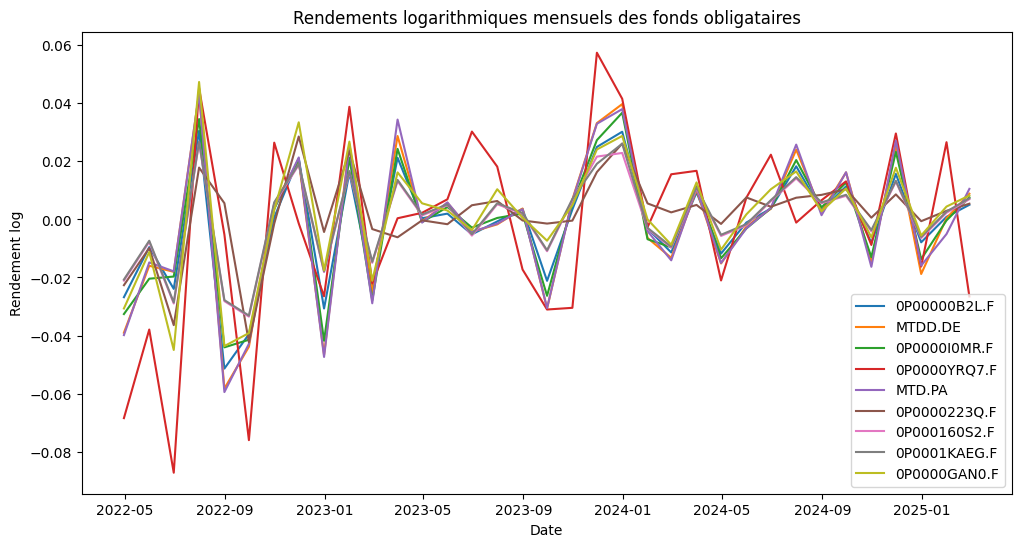

In [ ]:
# Calcul des rendements logarithmiques mensuels
returns_monthly = np.log(adj_close_monthly / adj_close_monthly.shift(1))

# Affichage des rendements calculés
print("Rendements mensuels :")
print(returns_monthly.head())

# Représentation graphique des rendements mensuels des fonds
plt.figure(figsize=(12,6))
for col in returns_monthly.columns:
    plt.plot(returns_monthly[col], label=col)
plt.legend()
plt.title("Rendements logarithmiques mensuels des fonds obligataires")
plt.xlabel("Date")
plt.ylabel("Rendement log")
plt.show()




#3 : Analyse de correlation : avec le bon du tresor US

<ipython-input-4-b9cf535c73f6>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  us_treasury_10y = us_treasury_10y.resample('M').last()  # Dernière valeur chaque mois


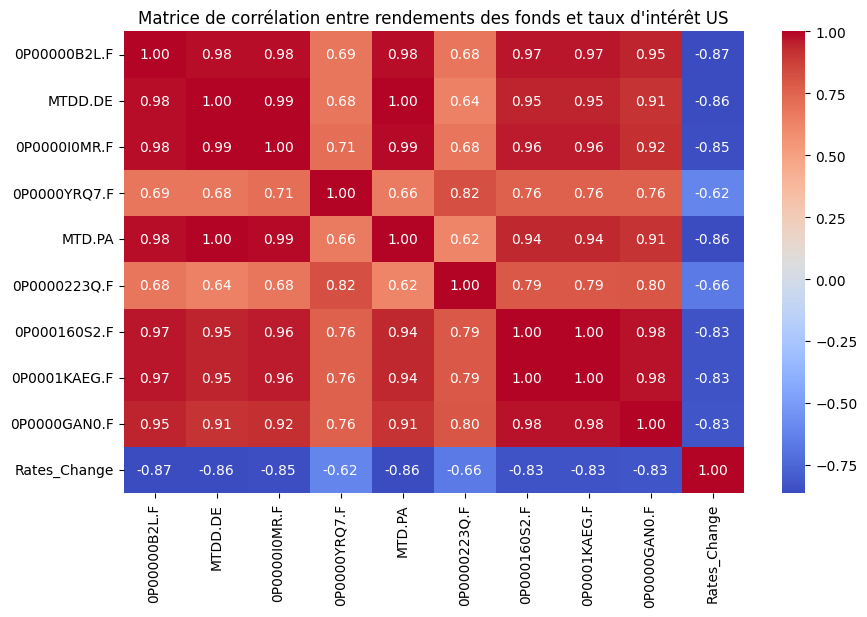

In [ ]:
from pandas_datareader import data as pdr

# Télécharger les taux d'intérêt US 10Y depuis la base de données de la FED
start_date = returns_monthly.index.min().strftime('%Y-%m-%d')
end_date = returns_monthly.index.max().strftime('%Y-%m-%d')

us_treasury_10y = pdr.get_data_fred('DGS10', start_date, end_date)  # Taux en %
us_treasury_10y /= 100  # Convertir en format décimal

# Transformation en variations mensuelles
us_treasury_10y = us_treasury_10y.resample('M').last()  # Dernière valeur chaque mois
rates_changes = us_treasury_10y.pct_change()  # Calcul de la variation mensuelle

# Fusion des rendements des fonds et des variations des taux d'intérêt
merged_data = pd.concat([returns_monthly, rates_changes], axis=1).dropna()
merged_data.columns = list(returns_monthly.columns) + ["Rates_Change"]

# Matrice de corrélation
correlation_matrix = merged_data.corr()

# Affichage de la matrice de corrélation entre rendements des fonds et taux d'intérêt US
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre rendements des fonds et taux d'intérêt US")
plt.show()


#3.2 : correlation avec BCE rates et Bund Allemand

### collecte des donnees

### rendements bunds allemands germany 10 year

In [ ]:
!pip install fredapi
import pandas as pd
from pandas_datareader import data as pdr

# Définir les dates de début et de fin pour la collecte des taux
start_date = '2020-01-01'
end_date = '2025-01-01'

#  Récupérer les rendements du Bund 10Y (via FRED)
bund_10y = pdr.get_data_fred('IRLTLT01DEM156N', start_date, end_date)

# Utilisation de la dernière donnée mensuelle
bund_10y = bund_10y.resample('M').last()

# Renommer la colonne correctement avec un dictionnaire
bund_10y = bund_10y.rename(columns={"IRLTLT01DEM156N": "Bund_10Y"})

# Affichage des résultats
print(" Rendement Bund 10Y :")
print(bund_10y)


 Rendement Bund 10Y :
            Bund_10Y
DATE                
2020-01-31 -0.313636
2020-02-29 -0.466000
2020-03-31 -0.541364
2020-04-30 -0.449500
2020-05-31 -0.516500
...              ...
2024-09-30  2.167143
2024-10-31  2.229565
2024-11-30  2.305714
2024-12-31  2.178889
2025-01-31  2.486190

[61 rows x 1 columns]


<ipython-input-5-6d0a8a471c7d>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bund_10y = bund_10y.resample('M').last()


### taux bund allemand, a mettre en mensuel

In [ ]:
import pandas_datareader.data as pdr

start_date = "2022-03-01"
end_date = "2025-03-31"

# Récupération des taux du Bund allemand à 10 ans
bund_10y_rates = pdr.get_data_fred('IRLTLT01DEM156N', start_date, end_date)

# Sélection des taux du dernier jour de chaque mois
bund_10y_rates_monthly = bund_10y_rates.resample('M').last()/100

# Affichage du résultat
print(bund_10y_rates_monthly)


            IRLTLT01DEM156N
DATE                       
2022-03-31         0.002817
2022-04-30         0.007463
2022-05-31         0.009527
2022-06-30         0.014450
2022-07-31         0.010819
2022-08-31         0.010343
2022-09-30         0.017955
2022-10-31         0.021867
2022-11-30         0.020664
2022-12-31         0.020852
2023-01-31         0.021927
2023-02-28         0.023705
2023-03-31         0.023835
2023-04-30         0.023594
2023-05-31         0.023423
2023-06-30         0.023764
2023-07-31         0.024567
2023-08-31         0.025457
2023-09-30         0.026614
2023-10-31         0.028232
2023-11-30         0.026014
2023-12-31         0.021021
2024-01-31         0.021745
2024-02-29         0.023319
2024-03-31         0.023495
2024-04-30         0.024457
2024-05-31         0.025195
2024-06-30         0.024845
2024-07-31         0.024583
2024-08-31         0.022077
2024-09-30         0.021671
2024-10-31         0.022296
2024-11-30         0.023057
2024-12-31         0

<ipython-input-6-7bebdb344f9a>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bund_10y_rates_monthly = bund_10y_rates.resample('M').last()/100


#3.3 extraction taux BCE

In [ ]:
import pandas as pd

# Remplace 'ton_fichier.csv' par le nom de ton fichier téléchargé
file_path = '/content/ECB Data Portal_20250310172744.csv'

# Lire le fichier CSV avec le bon séparateur
df = pd.read_csv(file_path, sep=';')

# Convertir la colonne "Date" en datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# S'assurer que "Date" est utilisée comme index
df.set_index('Date', inplace=True)

# Filtrer pour la période entre mars 2022 et mars 2025
df_filtered = df[(df.index >= '2022-03-01') & (df.index <= '2025-03-31')]

# Regrouper par mois et prendre la dernière valeur de chaque mois
df_month_end = df_filtered.resample('M').last()

# Diviser la colonne 'Rate' par 100 (car ce sont des pourcentages)
df_month_end['Rate'] = df_month_end['Rate'] / 100

# Afficher les résultats pour vérifier
print(df_month_end[['Rate']])  # Afficher seulement la colonne 'Rate' après division


AttributeError: module 'pandas' has no attribute 'read_xlsx'

### Ici on fait la matrice sans le graphique, que du texte : correlation entre fonds et taux BCE

In [ ]:
import pandas as pd

# Assumons que df_month_end et returns_monthly sont déjà définis dans ton environnement

# Afficher les premières lignes des deux dataframes pour s'assurer qu'ils sont correctement formatés
print("Premières lignes des taux de la BCE :")
print(df_month_end[['Rate']].head())

print("Premières lignes des rendements des fonds :")
print(returns_monthly.head())

# S'assurer que les deux DataFrames ont le même index (Date) pour que la corrélation fonctionne correctement
# On peut soit les aligner sur l'index, soit utiliser une fusion (ici on utilise l'index Date)
df_combined = pd.merge(df_month_end[['Rate']], returns_monthly, left_index=True, right_index=True, how='inner')

# Afficher la matrice combinée pour vérifier
print("Matrice combinée :")
print(df_combined.head())

# Calculer la matrice de corrélation entre les taux de la BCE et les rendements des fonds
correlation_matrix = df_combined.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)


Premières lignes des taux de la BCE :
               Rate
Date               
2022-03-31 -0.00593
2022-04-30 -0.00586
2022-05-31 -0.00589
2022-06-30 -0.00591
2022-07-31 -0.00091
Premières lignes des rendements des fonds :
            0P00000B2L.F   MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F    MTD.PA  \
Date                                                                       
2022-03-31           NaN       NaN           NaN           NaN       NaN   
2022-04-30     -0.026786 -0.039000     -0.032589     -0.068433 -0.039840   
2022-05-31     -0.009530 -0.015962     -0.020414     -0.037925 -0.014814   
2022-06-30     -0.023922 -0.018040     -0.019666     -0.087238 -0.017889   
2022-07-31      0.030498  0.043498      0.034566      0.045221  0.043410   

            0P0000223Q.F  0P000160S2.F  0P0001KAEG.F  0P0000GAN0.F  
Date                                                                
2022-03-31           NaN           NaN           NaN           NaN  
2022-04-30     -0.022647     -0.021078

## Matrice correlation taux BCE Court Terme et fonds

Premières lignes des taux de la BCE :
               Rate
Date               
2022-03-31 -0.00593
2022-04-30 -0.00586
2022-05-31 -0.00589
2022-06-30 -0.00591
2022-07-31 -0.00091
Premières lignes des rendements des fonds :
            0P00000B2L.F   MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F    MTD.PA  \
Date                                                                       
2022-03-31           NaN       NaN           NaN           NaN       NaN   
2022-04-30     -0.026786 -0.039000     -0.032589     -0.068433 -0.039840   
2022-05-31     -0.009530 -0.015962     -0.020414     -0.037925 -0.014814   
2022-06-30     -0.023922 -0.018040     -0.019666     -0.087238 -0.017889   
2022-07-31      0.030498  0.043498      0.034566      0.045221  0.043410   

            0P0000223Q.F  0P000160S2.F  0P0001KAEG.F  0P0000GAN0.F  
Date                                                                
2022-03-31           NaN           NaN           NaN           NaN  
2022-04-30     -0.022647     -0.021078

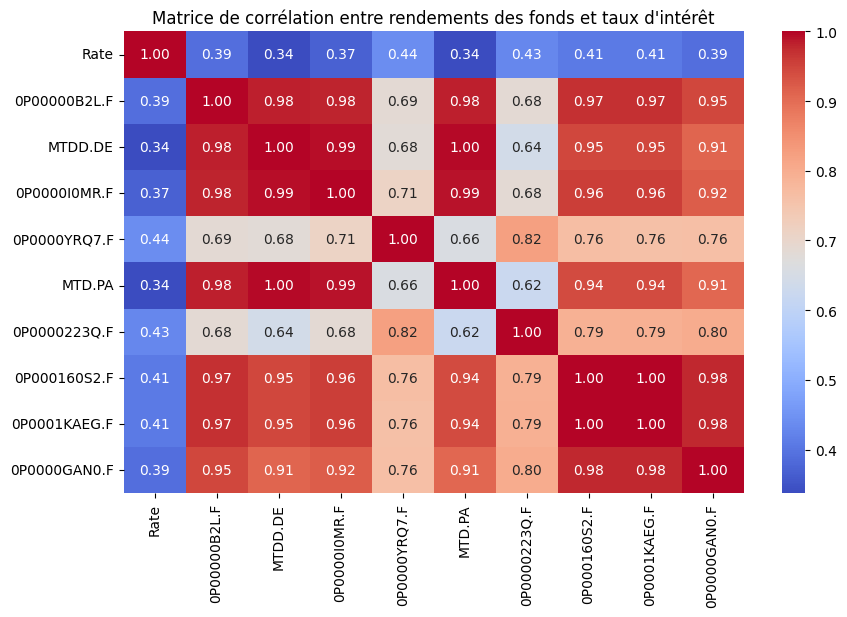

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assumons que df_month_end et returns_monthly sont déjà définis dans ton environnement

# Afficher les premières lignes des deux dataframes pour s'assurer qu'ils sont correctement formatés
print("Premières lignes des taux de la BCE :")
print(df_month_end[['Rate']].head())

print("Premières lignes des rendements des fonds :")
print(returns_monthly.head())

# S'assurer que les deux DataFrames ont le même index (Date) pour que la corrélation fonctionne correctement
# On peut soit les aligner sur l'index, soit utiliser une fusion (ici on utilise l'index Date)
df_combined = pd.merge(df_month_end[['Rate']], returns_monthly, left_index=True, right_index=True, how='inner')

# Afficher la matrice combinée pour vérifier
print("Matrice combinée :")
print(df_combined.head())

# Calculer la matrice de corrélation entre les taux de la BCE et les rendements des fonds
correlation_matrix = df_combined.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre rendements des fonds et taux d'intérêt")
plt.show()


## Matrice Bond Allemand 10y

<ipython-input-19-c1cf751c6b67>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bund_10y = bund_10y.resample('M').last()


📌 Rendement Bund 10Y :
            Bund_10Y
DATE                
2020-01-31 -0.313636
2020-02-29 -0.466000
2020-03-31 -0.541364
2020-04-30 -0.449500
2020-05-31 -0.516500
Premières lignes des rendements des fonds :
            0P00000B2L.F   MTDD.DE  0P0000I0MR.F  0P0000YRQ7.F    MTD.PA  \
Date                                                                       
2022-03-31           NaN       NaN           NaN           NaN       NaN   
2022-04-30     -0.026786 -0.039000     -0.032589     -0.068433 -0.039840   
2022-05-31     -0.009530 -0.015962     -0.020414     -0.037925 -0.014814   
2022-06-30     -0.023922 -0.018040     -0.019666     -0.087238 -0.017889   
2022-07-31      0.030498  0.043498      0.034566      0.045221  0.043410   

            0P0000223Q.F  0P000160S2.F  0P0001KAEG.F  0P0000GAN0.F  
Date                                                                
2022-03-31           NaN           NaN           NaN           NaN  
2022-04-30     -0.022647     -0.021078     -0.

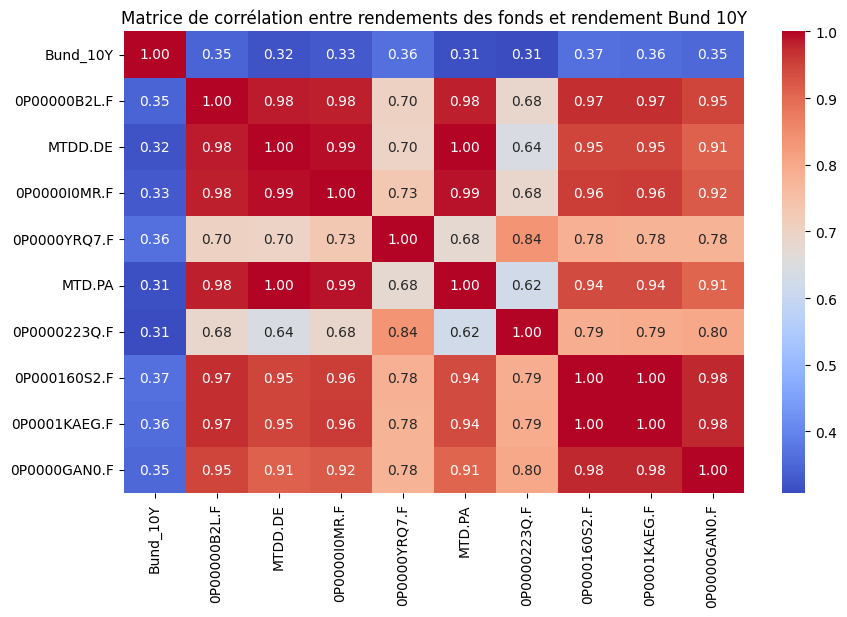

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les dates de début et de fin pour la collecte des taux
start_date = '2020-01-01'
end_date = '2025-01-01'

#  Récupérer les rendements du Bund 10Y (via FRED)
bund_10y = pdr.get_data_fred('IRLTLT01DEM156N', start_date, end_date)

# Utilisation de la dernière donnée mensuelle
bund_10y = bund_10y.resample('M').last()

# Renommer la colonne correctement avec un dictionnaire
bund_10y = bund_10y.rename(columns={"IRLTLT01DEM156N": "Bund_10Y"})

# Afficher les premières lignes des rendements du Bund 10Y
print(" Rendement Bund 10Y :")
print(bund_10y.head())

# Supposons que returns_monthly contient les rendements mensuels des fonds (déjà défini dans ton environnement)

# Afficher les premières lignes des rendements des fonds
print("Premières lignes des rendements des fonds :")
print(returns_monthly.head())

# On s'assure que les deux DataFrames ont le même index (Date) pour que la corrélation fonctionne correctement
# Fusionner les DataFrames sur l'index de la Date
df_combined = pd.merge(bund_10y[['Bund_10Y']], returns_monthly, left_index=True, right_index=True, how='inner')

# Afficher la matrice combinée pour vérifier
print("Matrice combinée :")
print(df_combined.head())

# Calculer la matrice de corrélation entre les rendements du Bund 10Y et les rendements des fonds
correlation_matrix = df_combined.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
print(correlation_matrix)

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre rendements des fonds et rendement Bund 10Y")
plt.show()


#4 : analyse de causalité de Granger

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

# 1. Fusionner les données pour garantir des indices identiques
df_bce_fonds = pd.merge(df_month_end[['Rate']], returns_monthly, left_index=True, right_index=True, how='inner')
df_bund_fonds = pd.merge(bund_10y[['Bund_10Y']], returns_monthly, left_index=True, right_index=True, how='inner')

# 2. Gérer les valeurs NaN ou infinies
df_bce_fonds.replace([np.inf, -np.inf], np.nan, inplace=True)
df_bund_fonds.replace([np.inf, -np.inf], np.nan, inplace=True)

df_bce_fonds.dropna(inplace=True)
df_bund_fonds.dropna(inplace=True)

#3. On vérifie la stationnarité des différentes séries (Augmented Dickey-Fuller)
def test_stationarity(series):
    result = adfuller(series.dropna())  # Enlever NaN avant test
    print(f"Test ADF pour {series.name}: p-value = {result[1]:.4f}")
    if result[1] < 0.05:
        print("Stationnaire")
    else:
        print("Non stationnaire, on applique une différenciation")
        return series.diff().dropna()  # Différenciation pour stationnariser
    return series

# On applique la stationnarité sur toutes les séries
df_bce_fonds = df_bce_fonds.apply(test_stationarity)
df_bund_fonds = df_bund_fonds.apply(test_stationarity)

# Fonction pour le test de Granger
def granger_test(df, cause, effects, max_lag=3):
    results = {}
    for effect in effects:
        print(f"\n Test de causalité de Granger entre {cause} {effect}")
        try:
            test_result = grangercausalitytests(df[[effect, cause]], max_lag, verbose=False)
            p_values = [test_result[i+1][0]['ssr_chi2test'][1] for i in range(max_lag)]
            results[effect] = p_values
            print(f"Résultat : {p_values}")
        except Exception as e:
            print(f"⚠ Erreur pour {effect} : {e}")
    return results

# 5. Appliquer le test de Granger
print("\n Granger Causality - BCE Rates vs Fonds:")
granger_bce = granger_test(df_bce_fonds, 'Rate', returns_monthly.columns)

print("\n Granger Causality - Bund 10Y vs Fonds:")
granger_bund = granger_test(df_bund_fonds, 'Bund_10Y', returns_monthly.columns)


📊 Test ADF pour Rate: p-value = 0.0245
✅ Stationnaire
📊 Test ADF pour 0P00000B2L.F: p-value = 0.0118
✅ Stationnaire
📊 Test ADF pour MTDD.DE: p-value = 0.0186
✅ Stationnaire
📊 Test ADF pour 0P0000I0MR.F: p-value = 0.0595
❌ Non stationnaire, on applique une différenciation
📊 Test ADF pour 0P0000YRQ7.F: p-value = 0.0000
✅ Stationnaire
📊 Test ADF pour MTD.PA: p-value = 0.0208
✅ Stationnaire
📊 Test ADF pour 0P0000223Q.F: p-value = 0.0002
✅ Stationnaire
📊 Test ADF pour 0P000160S2.F: p-value = 0.0026
✅ Stationnaire
📊 Test ADF pour 0P0001KAEG.F: p-value = 0.0027
✅ Stationnaire
📊 Test ADF pour 0P0000GAN0.F: p-value = 0.0000
✅ Stationnaire
📊 Test ADF pour Bund_10Y: p-value = 0.0396
✅ Stationnaire
📊 Test ADF pour 0P00000B2L.F: p-value = 0.0128
✅ Stationnaire
📊 Test ADF pour MTDD.DE: p-value = 0.0184
✅ Stationnaire
📊 Test ADF pour 0P0000I0MR.F: p-value = 0.0669
❌ Non stationnaire, on applique une différenciation
📊 Test ADF pour 0P0000YRQ7.F: p-value = 0.0486
✅ Stationnaire
📊 Test ADF pour MTD.PA: 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print resul

Résultat : [0.005583854107854974, 0.007883642069073549, 0.10513136214000557]

📊 Test de causalité de Granger entre Rate ➡️ MTD.PA
Résultat : [0.023615528200159823, 0.029353877504470004, 0.007634617411037279]

📊 Test de causalité de Granger entre Rate ➡️ 0P0000223Q.F
Résultat : [0.013768513907462558, 0.00632017199501773, 0.3071228219376703]

📊 Test de causalité de Granger entre Rate ➡️ 0P000160S2.F
Résultat : [0.0034789184621183997, 0.003489654750039291, 0.007294017545448399]

📊 Test de causalité de Granger entre Rate ➡️ 0P0001KAEG.F
Résultat : [0.003326425264916741, 0.0034019751969571136, 0.0076767570623270205]

📊 Test de causalité de Granger entre Rate ➡️ 0P0000GAN0.F
Résultat : [0.004412539253321918, 0.013161802247053373, 0.009275109584472219]

📊 Granger Causality - Bund 10Y vs Fonds:

📊 Test de causalité de Granger entre Bund_10Y ➡️ 0P00000B2L.F
Résultat : [2.5304609938600857e-05, 1.3547305072109755e-05, 3.9746642839064297e-05]

📊 Test de causalité de Granger entre Bund_10Y ➡️ MTDD.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


#5 : Modelisation GARCH Volatilite

## volatilite moyenne des fonds

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003529. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005837. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarn

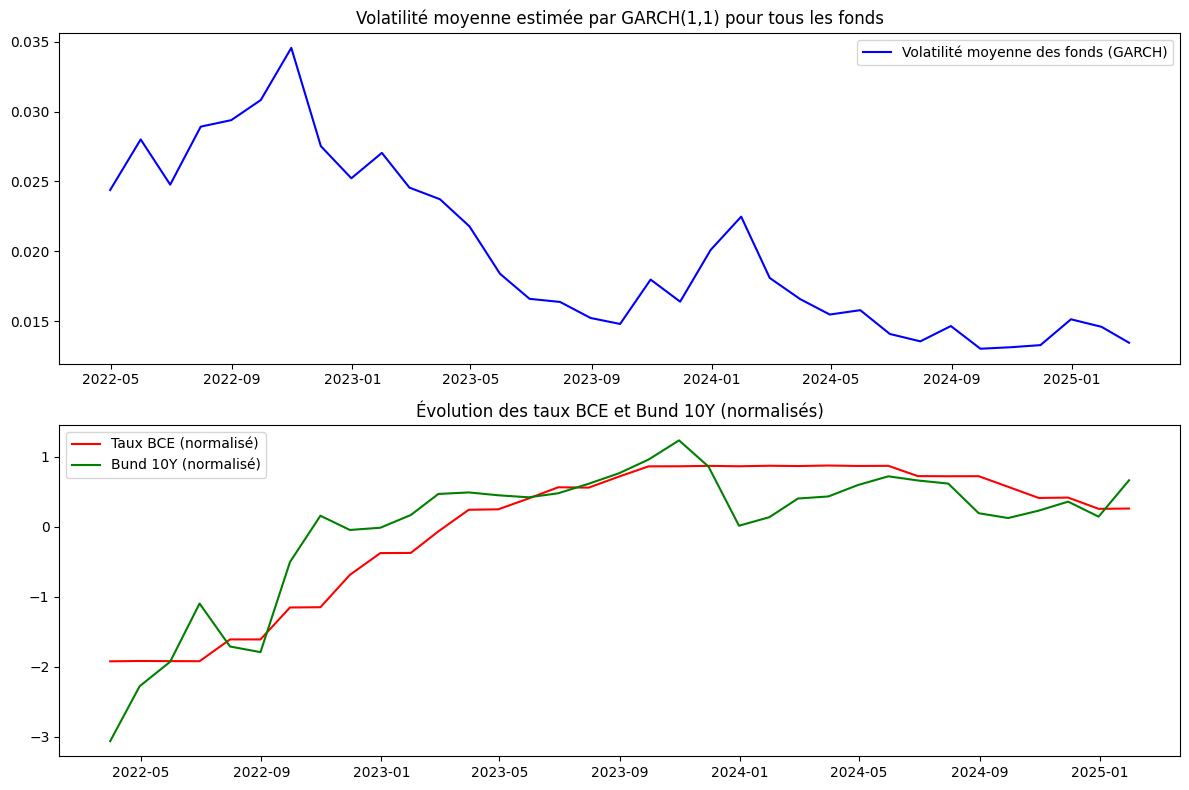

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Initialiser un DataFrame pour stocker les volatilités estimées
volatility_garch = pd.DataFrame(index=returns_monthly.index)

# Boucle sur chaque fonds pour ajuster un modèle GARCH(1,1)
for fonds in returns_monthly.columns:
    # Suppression des NaN
    returns_fonds = returns_monthly[fonds].dropna()

    # Ajustement du modèle GARCH(1,1)
    garch_model = arch_model(returns_fonds, vol='Garch', p=1, q=1)
    garch_fit = garch_model.fit(disp='off')  # Ajustement silencieux

    # Stockage de la volatilité conditionnelle
    volatility_garch[fonds] = garch_fit.conditional_volatility

# Ajout des taux BCE et Bund 10Y dans l'analyse
df_taux = pd.merge(df_month_end[['Rate']], bund_10y[['Bund_10Y']], left_index=True, right_index=True, how='inner')

# Normaliser les taux pour faciliter la comparaison (moyenne = 0, écart-type = 1)
df_taux_norm = (df_taux - df_taux.mean()) / df_taux.std()

#  **Affichage des résultats**
plt.figure(figsize=(12,8))

# 1. Affichage de la volatilité moyenne des fonds
plt.subplot(2,1,1)
plt.plot(volatility_garch.mean(axis=1), color='blue', label="Volatilité moyenne des fonds (GARCH)")
plt.title("Volatilité moyenne estimée par GARCH(1,1) pour tous les fonds")
plt.legend()

# 2. Comparaison avec les taux BCE et Bund 10Y
plt.subplot(2,1,2)
plt.plot(df_taux_norm['Rate'], color='red', label="Taux BCE (normalisé)")
plt.plot(df_taux_norm['Bund_10Y'], color='green', label="Bund 10Y (normalisé)")
plt.title("Évolution des taux BCE et Bund 10Y (normalisés)")
plt.legend()

plt.tight_layout()
plt.show()


## volatilite de tous les fonds

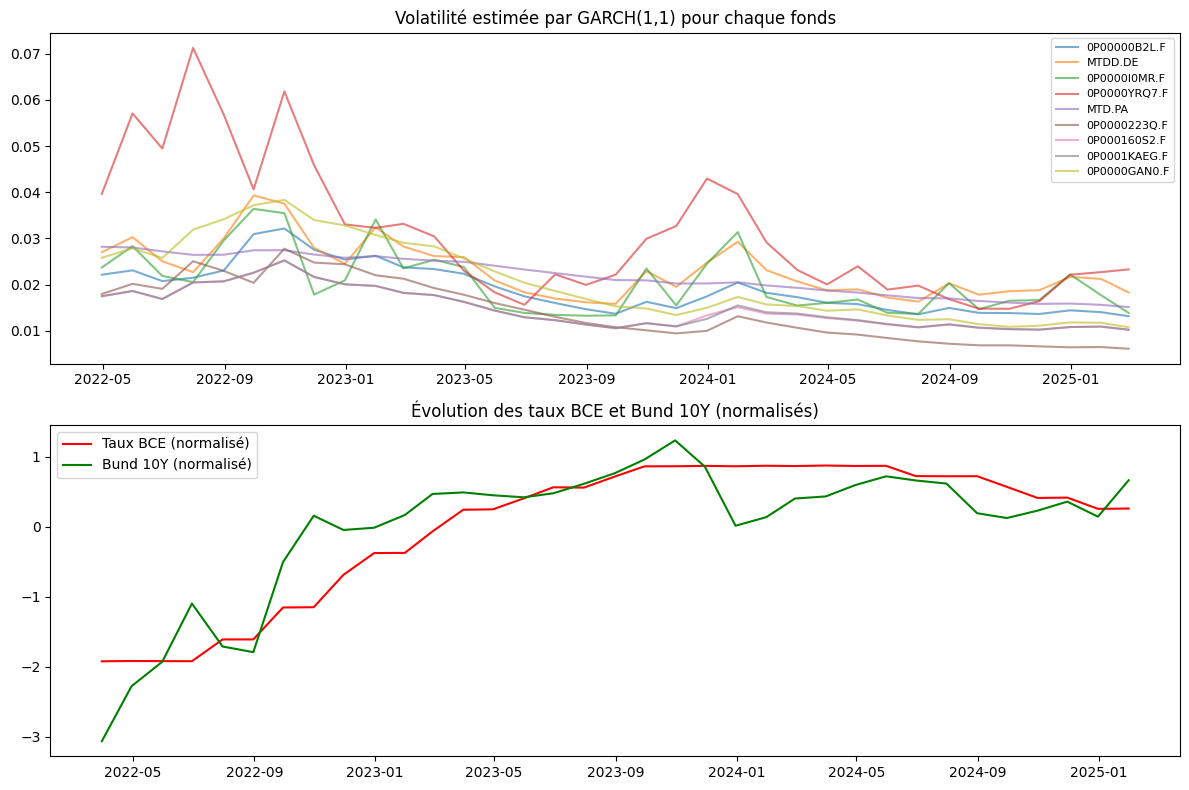

In [ ]:
plt.figure(figsize=(12,8))

# 1. Volatilité de chaque fonds individuellement
plt.subplot(2,1,1)
for fonds in volatility_garch.columns:
    plt.plot(volatility_garch[fonds], label=fonds, alpha=0.6)
plt.title("Volatilité estimée par GARCH(1,1) pour chaque fonds")
plt.legend(loc="upper right", fontsize=8)

# 2. Comparaison avec les taux BCE et Bund 10Y
plt.subplot(2,1,2)
plt.plot(df_taux_norm['Rate'], color='red', label="Taux BCE (normalisé)")
plt.plot(df_taux_norm['Bund_10Y'], color='green', label="Bund 10Y (normalisé)")
plt.title("Évolution des taux BCE et Bund 10Y (normalisés)")
plt.legend()

plt.tight_layout()
plt.show()
